<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/Chapter10/Chapter10_2_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사이파이 병합 군집 적용


거리 행렬 계산법

In [2]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


사이파이의 spatial.distance 모듈에서 pdist 함수를 사용해서 계층 군집 알고리즘의 입력에 사용할 거리 행렬을 계산할 수 있음.

In [5]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(
    squareform( pdist(df, metric='euclidean')),
    columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


그 다음 사이파이 cluster.hierarchy 모듈의 linkage 함수를 사용해서 완전 연결 병합을 적용할 수 있음.

In [6]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [9]:
pdist(df, metric='euclidean')

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

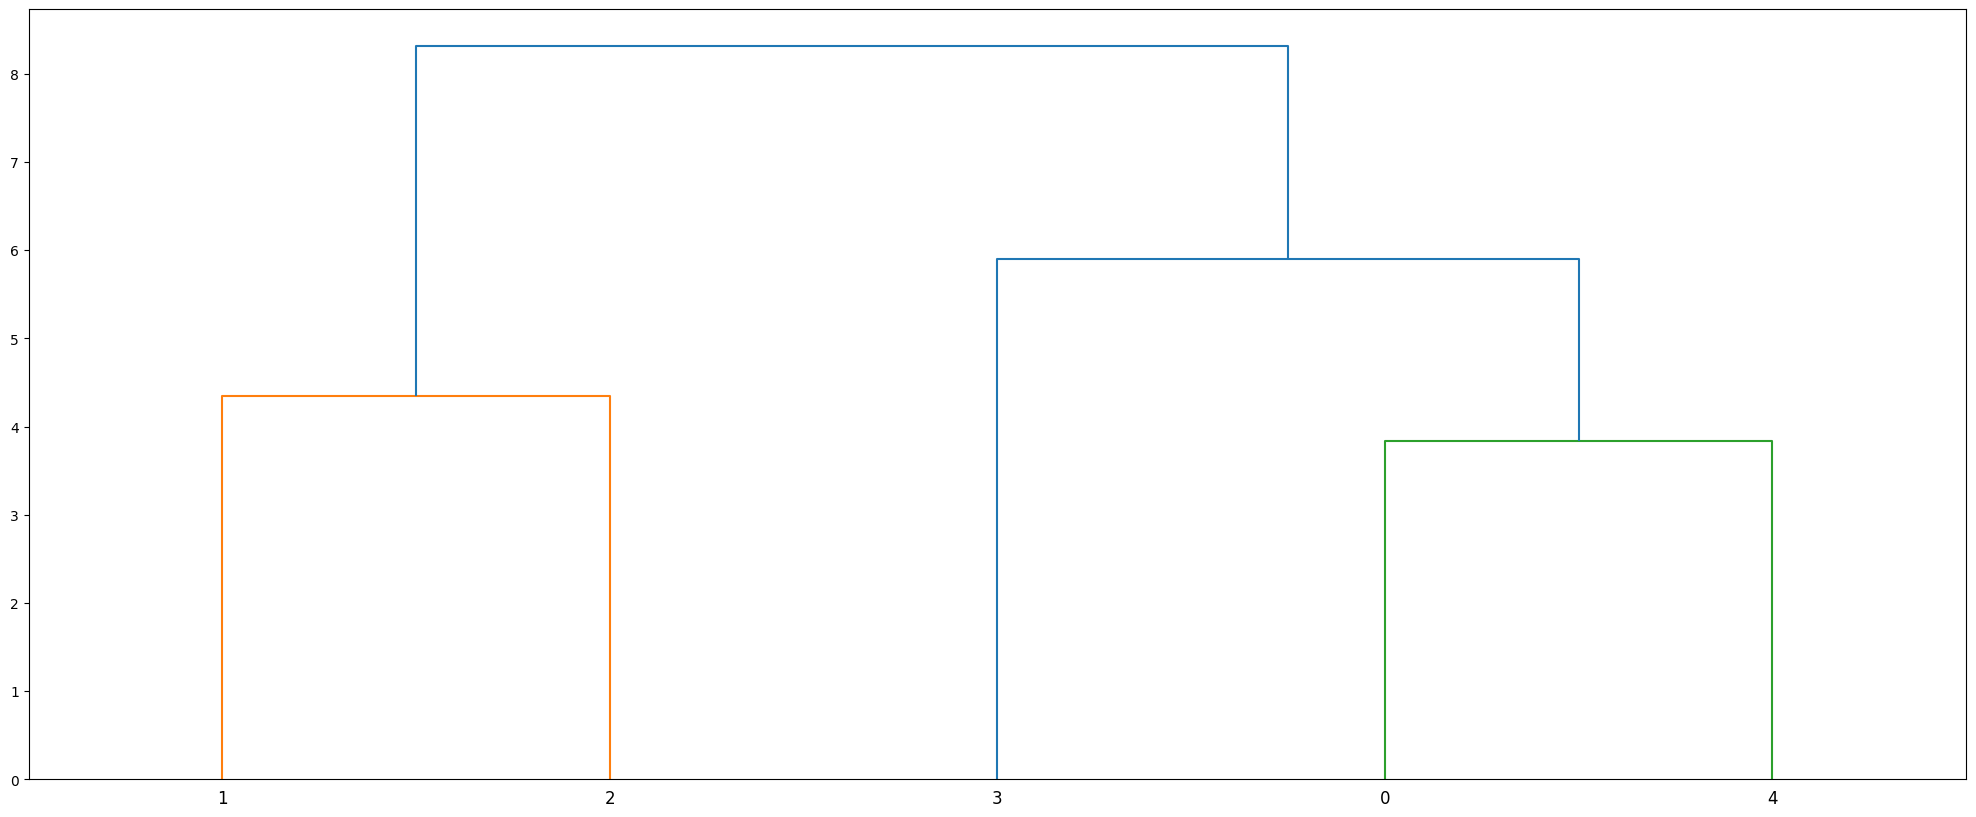

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

row_clusters = linkage(pdist(df, metric='euclidean'),
            method = 'complete')
fig = plt.figure(figsize= (25,10))
dn = dendrogram(row_clusters)
plt.show()

In [16]:
df.values

array([[6.96469186, 2.86139335, 2.26851454],
       [5.51314769, 7.1946897 , 4.2310646 ],
       [9.80764198, 6.84829739, 4.80931901],
       [3.92117518, 3.43178016, 7.29049707],
       [4.38572245, 0.59677897, 3.98044255]])

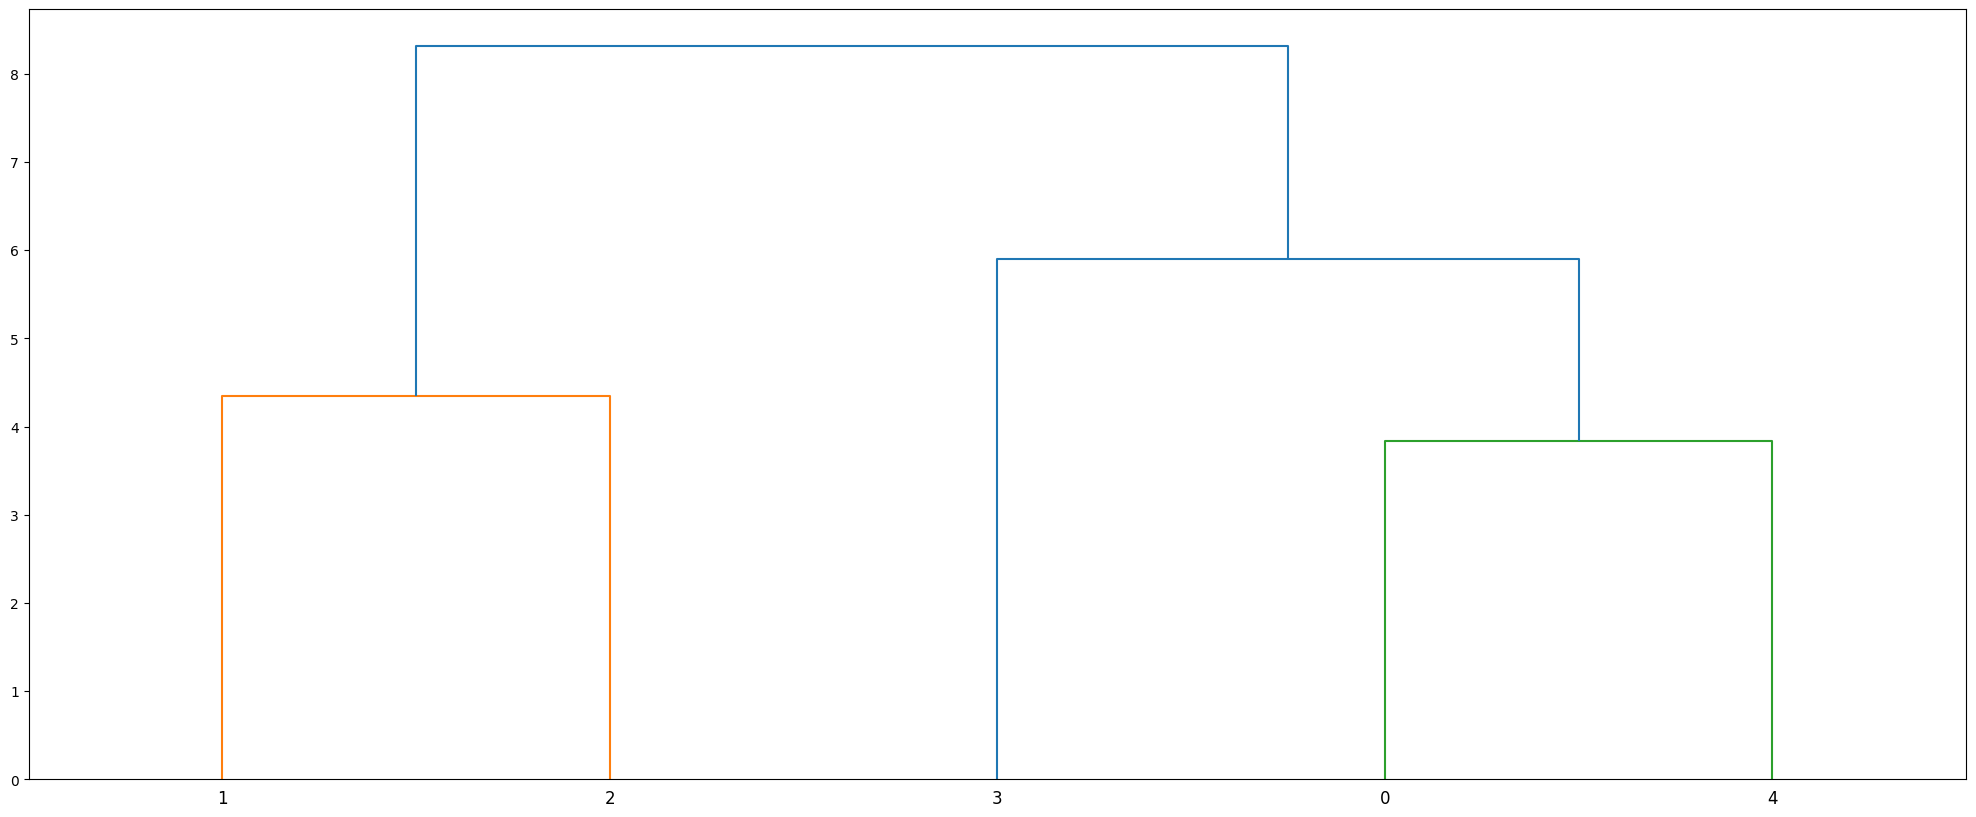

In [19]:
row_cluster = linkage( df.values, method = "complete", metric = 'euclidean')
fig = plt.figure(figsize= (25,10))
dn = dendrogram(row_clusters)
plt.show()

군집 결과는 다음과 같이 살펴볼 수 있음

In [21]:
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [22]:
pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i+1) for i in
                      range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


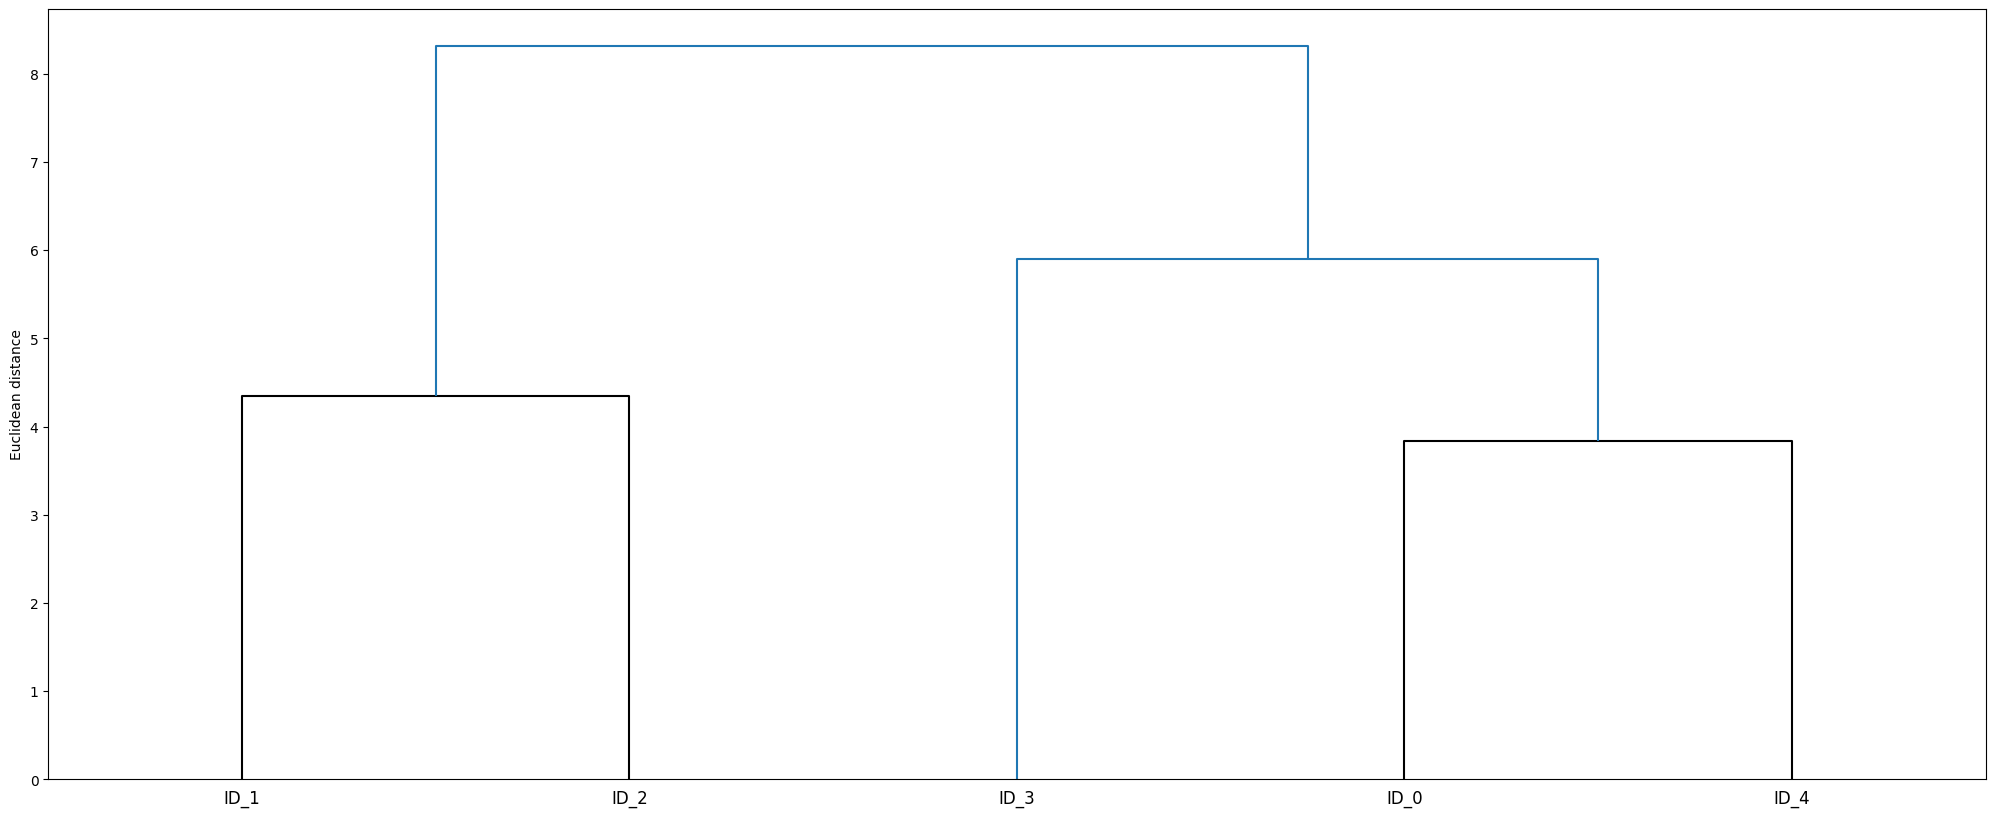

['black', 'black', 'C0', 'C0']

In [29]:
# 검은색 덴드로그램 만들기 (1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_cluster = linkage( df.values, method = "complete", metric = 'euclidean')
fig = plt.figure(figsize= (25,10))
dn = dendrogram(row_clusters,
                labels = labels,
                # color_threshold = np.inf # 검은색 덴드로그램 만들기 (2/2)
                )
plt.ylabel('Euclidean distance')
plt.show()
dn['color_list']

# 히트맵에 덴드로그램 연결

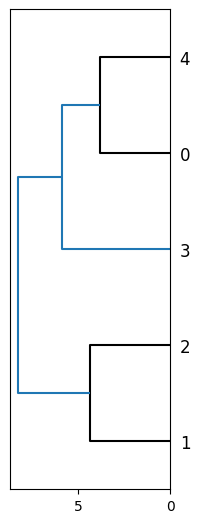

In [42]:
fig = plt.figure(figsize = (8,8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')
# 노트 : matplotlib < v1.5.1 일 때는 use orientatoin = 'right' 를 사용하자

In [53]:
row_dendr['leaves']

[1, 2, 3, 0, 4]

In [43]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
df_rowclust

,X,Y,Z
ID_4,4.385722,0.596779,3.980443
ID_0,6.964692,2.861393,2.268515
ID_3,3.921175,3.431780,7.290497
ID_2,9.807642,6.848297,4.809319
ID_1,5.513148,7.194690,4.231065


In [44]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation = 'nearest', cmap = 'hot_r')

In [54]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

<ipython-input-54-d6b93cf8b785>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-54-d6b93cf8b785>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


<ipython-input-61-566542bc067e>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-61-566542bc067e>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


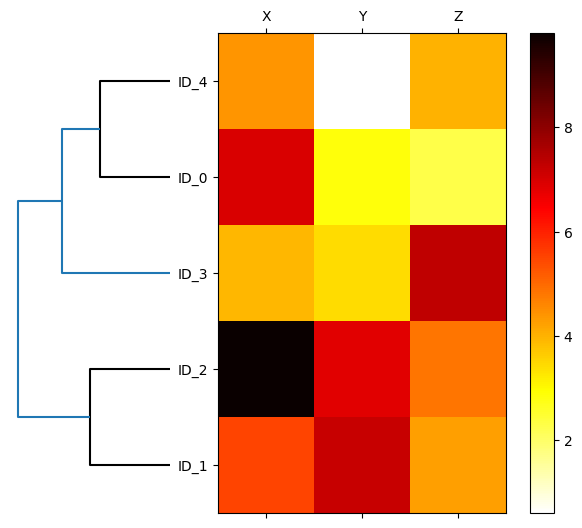

In [61]:
fig = plt.figure(figsize = (8,8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')
# 노트 : matplotlib < v1.5.1 일 때는 use orientatoin = 'right' 를 사용하자
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation = 'nearest', cmap = 'hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

# 사이킷런에서 병합 군집 적용

In [63]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3,
                             metric = 'euclidean',
                             linkage = 'complete')
labels = ac.fit_predict(X)
print(f' 클러스터 레이블 : {labels}')

 클러스터 레이블 : [1 0 0 2 1]


In [64]:
ac = AgglomerativeClustering(n_clusters = 2,
                             metric = 'euclidean',
                             linkage = 'complete')
labels = ac.fit_predict(X)
print(f' 클러스터 레이블 : {labels}')

 클러스터 레이블 : [0 1 1 0 0]
